In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Download and import the following data set, then answer the following questions!
#https://data.cityofchicago.org/Public-Safety/Strategic-Subject-List/4aki-r3np/data
df = pd.read_csv("../../assets/Strategic_Subject_List.csv")

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#How many records are in the data?
df.shape

(398684, 48)

In [4]:
#Which predictors/variables (columns) are missing values?
df.isnull().sum()

SSL SCORE                                        0
PREDICTOR RAT AGE AT LATEST ARREST             102
PREDICTOR RAT VICTIM SHOOTING INCIDENTS          0
PREDICTOR RAT VICTIM BATTERY OR ASSAULT          0
PREDICTOR RAT ARRESTS VIOLENT OFFENSES           0
PREDICTOR RAT GANG AFFILIATION                   0
PREDICTOR RAT NARCOTIC ARRESTS                   0
PREDICTOR RAT TREND IN CRIMINAL ACTIVITY         0
PREDICTOR RAT UUW ARRESTS                        0
SEX CODE CD                                      0
RACE CODE CD                                     0
WEAPON I                                         0
DRUG I                                           0
AGE GROUP                                      153
AGE TO                                         153
STOP ORDER NO                               397027
PAROLEE I                                   385600
LATEST DATE                                      0
LATEST DIST                                      0
MAJORITY DIST                  

In [32]:
#let's drop the variables that are missing a ton of data
df2= df[["SSL SCORE", "SEX CODE CD", "RACE CODE CD", "PREDICTOR RAT AGE AT LATEST ARREST", "IDOC RES CITY", "PREDICTOR RAT AGE AT LATEST ARREST"]]
df2.head()

,SSL SCORE,SEX CODE CD,RACE CODE CD,PREDICTOR RAT AGE AT LATEST ARREST,IDOC RES CITY,PREDICTOR RAT AGE AT LATEST ARREST
0,500,M,BLK,20-30,SKOKIE,20-30
1,500,M,WHI,20-30,NaN,20-30
2,500,M,WHI,less than 20,NaN,less than 20
3,500,M,BLK,less than 20,NaN,less than 20
4,500,M,BLK,less than 20,NaN,less than 20


In [10]:
#What is the average SSL score? The max SSL score? The min SSL score?
df2["SSL SCORE"].describe()

count   398684.000
mean       279.840
std         57.996
min         10.000
25%        242.000
50%        289.000
75%        322.000
max        500.000
Name: SSL SCORE, dtype: float64

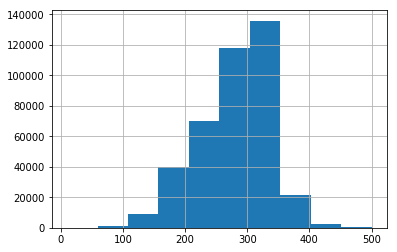

In [13]:
#What is the distribution of the SSL scores?
df2["SSL SCORE"].hist()

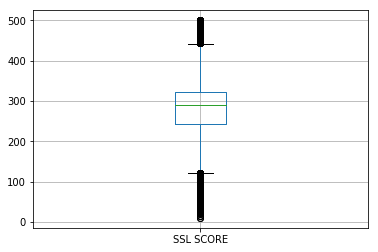

In [16]:
df2.boxplot(column = "SSL SCORE")

In [18]:
#How do we simply view the "SSL Score" columns?
df2["SSL SCORE"].head()

0    500
1    500
2    500
3    500
4    500
Name: SSL SCORE, dtype: int64

In [19]:
#What about the first fifty columns?
df2["SSL SCORE"].head(50)

0     500
1     500
2     500
3     500
4     500
5     500
6     498
7     497
8     495
9     495
10    489
11    488
12    487
13    485
14    483
15    481
16    480
17    476
18    475
19    473
20    472
21    472
22    471
23    471
24    470
25    467
26    467
27    467
28    466
29    463
30    462
31    462
32    460
33    458
34    455
35    455
36    454
37    454
38    453
39    453
40    452
41    450
42    449
43    448
44    447
45    447
46    446
47    446
48    445
49    445
Name: SSL SCORE, dtype: int64

In [20]:
#What about the fifty LOWEST scores?
df2["SSL SCORE"].tail(50)

398634    254
398635    254
398636    251
398637    251
398638    250
398639    250
398640    250
398641    246
398642    246
398643    243
398644    238
398645    234
398646    233
398647    232
398648    232
398649    232
398650    228
398651    227
398652    227
398653    226
398654    225
398655    225
398656    222
398657    220
398658    215
398659    211
398660    210
398661    210
398662    206
398663    193
398664    192
398665    188
398666    183
398667    175
398668    174
398669    170
398670    168
398671    147
398672    134
398673    134
398674    129
398675    329
398676    308
398677    304
398678    333
398679    310
398680    269
398681     86
398682    245
398683    321
Name: SSL SCORE, dtype: int64

In [21]:
#What about SSL Score, Sex Code CD and Race Code CD?
df[["SSL SCORE", "SEX CODE CD", "RACE CODE CD"]].head()

,SSL SCORE,SEX CODE CD,RACE CODE CD
0,500,M,BLK
1,500,M,WHI
2,500,M,WHI
3,500,M,BLK
4,500,M,BLK


In [23]:
#What are the different race categories?
df["RACE CODE CD"].unique()

array(['BLK', 'WHI', 'WWH', 'API', 'WBH', 'U', 'I'], dtype=object)

In [29]:
#How can we know the counts of each race?
df["RACE CODE CD"].value_counts()

BLK    207842
WWH     99710
WHI     82366
API      4617
WBH      1974
U        1899
I         276
Name: RACE CODE CD, dtype: int64

In [31]:
#How many black women had an SSL SCORE of 400 or more?
len(df2[(df2["RACE CODE CD"] == "BLK") & (df2["SEX CODE CD"] == "F") & (df2["SSL SCORE"] > 400)])


190

In [38]:
#How many Asian/Pacific Islander males under 20 were victims of shooting incidents?
len(df[(df["RACE CODE CD"] == "API") & (df["SEX CODE CD"] == "M") & (df["PREDICTOR RAT AGE AT LATEST ARREST"] == "less than 20")])

450

In [39]:
#How do we find out how many people on SSL are from the suburbs listed below?

#"SKOKIE","WILMETTE","EVANSTON","DES PLAINES","PALATINE","ARLINGTON HTS","SCHAUMBERG"

burbs = ["SKOKIE","WILMETTE","EVANSTON","DES PLAINES","PALATINE","ARLINGTON HTS","SCHAUMBERG"]

len(df[(df["IDOC RES CITY"].isin(burbs))])

551

In [41]:
#How do we create a column that flags senior citizens with scores less than 450?
#Hint! First write a function then pair it with a lambda function

def seniors_crime_flag(x,y):
    if (x == "70-80") & (y < 450):
        return 1
    elif (x == "60-70") & (y < 450):
        return 1
    else:
        return 0

In [42]:
df["SENIOR_CRIME_FLAG"] = df.apply(lambda x: seniors_crime_flag(x["PREDICTOR RAT AGE AT LATEST ARREST"], x["SSL SCORE"]), axis=1)

In [43]:
df["SENIOR_CRIME_FLAG"].sum()

8819L